In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from models.generative.utils import *
from data_manipulation.data import Data

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:90% !important;}</style>'))

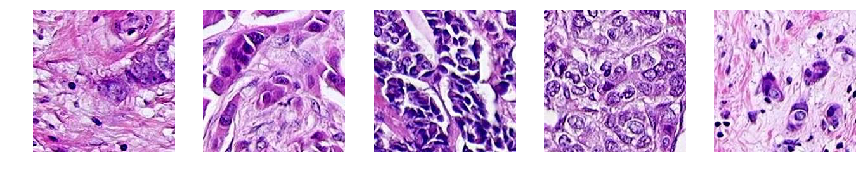

In [2]:
data = Data(dataset='nki', marker='he', patch_h=224, patch_w=224, n_channels=3, batch_size=10)
images, label = data.training.next_batch(10)

plot_images(plt_num=5, images=images, dim=30)

INFO:tensorflow:Summary name discriminator/conv_layer_1/filter:0 is illegal; using discriminator/conv_layer_1/filter_0 instead.
INFO:tensorflow:Summary name discriminator/conv_layer_2/filter:0 is illegal; using discriminator/conv_layer_2/filter_0 instead.
INFO:tensorflow:Summary name discriminator/conv_layer_3/filter:0 is illegal; using discriminator/conv_layer_3/filter_0 instead.
INFO:tensorflow:Summary name discriminator/conv_layer_4/filter:0 is illegal; using discriminator/conv_layer_4/filter_0 instead.
INFO:tensorflow:Summary name discriminator/conv_layer_5/filter:0 is illegal; using discriminator/conv_layer_5/filter_0 instead.
INFO:tensorflow:Summary name discriminator/dense_layer_1/kernel:0 is illegal; using discriminator/dense_layer_1/kernel_0 instead.
INFO:tensorflow:Summary name discriminator/dense_layer_2/kernel:0 is illegal; using discriminator/dense_layer_2/kernel_0 instead.
INFO:tensorflow:Summary name discriminator/conv_layer_1/filter:0 is illegal; using discriminator/con

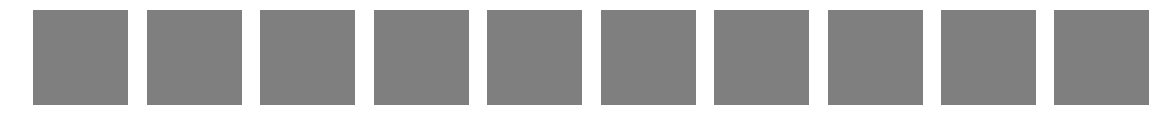

Epochs 1/4: Generator Loss: 13.665. Discriminator Loss: 0.0026
Epochs 1/4: Generator Loss: 13.6496. Discriminator Loss: 0.0025
Epochs 1/4: Generator Loss: 14.5371. Discriminator Loss: 0.0033
Epochs 1/4: Generator Loss: 14.0382. Discriminator Loss: 0.0037
Epochs 1/4: Generator Loss: 14.2784. Discriminator Loss: 0.0098
Epochs 1/4: Generator Loss: 15.2504. Discriminator Loss: 0.0021
Epochs 1/4: Generator Loss: 17.131. Discriminator Loss: 0.0042
Epochs 1/4: Generator Loss: 17.3795. Discriminator Loss: 0.0045
Epochs 1/4: Generator Loss: 17.3865. Discriminator Loss: 0.0063
Epochs 1/4: Generator Loss: 17.7735. Discriminator Loss: 0.0021


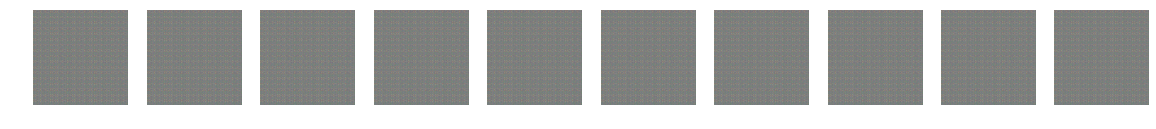

Epochs 1/4: Generator Loss: 18.303. Discriminator Loss: 0.0044
Epochs 1/4: Generator Loss: 18.4552. Discriminator Loss: 0.0047
Epochs 1/4: Generator Loss: 17.3322. Discriminator Loss: 0.003
Epochs 1/4: Generator Loss: 16.7253. Discriminator Loss: 0.0034
Epochs 1/4: Generator Loss: 16.8974. Discriminator Loss: 0.0022
Epochs 1/4: Generator Loss: 19.3136. Discriminator Loss: 0.0096
Epochs 1/4: Generator Loss: 18.2974. Discriminator Loss: 0.0025
Epochs 1/4: Generator Loss: 16.7062. Discriminator Loss: 0.0045
Epochs 1/4: Generator Loss: 19.9609. Discriminator Loss: 0.0056
Epochs 1/4: Generator Loss: 18.6044. Discriminator Loss: 0.0015


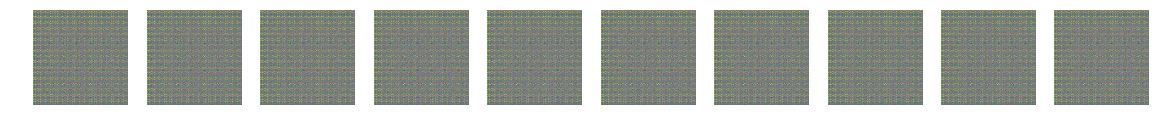

KeyboardInterrupt: 

In [3]:
from models.generative.gans.SNGAN import SNGAN
model = 'SNGAN'


main_path = '/home/adalberto/Documents/Cancer_TMA_Generative/data model output/' + model
main_path = '/Users/adalbertoclaudioquiros/Documents/Code/UofG/PhD/Cancer_TMA_Generative/data model output/' + model

# Dataset information.
image_width = 224
image_height = 224
image_channels = 3
dataset='nki'
marker='he'
name_run = 'h%s_w%s_n%s' % (image_height, image_width, image_channels)
data_out_path = '%s/%s' % (main_path, name_run)

# Hyperparameters.
epochs = 4
batch_size = 64
z_dim = 100
learning_rate_g = 1e-4
learning_rate_d = 1e-4
alpha = 0.2
beta_1 = 0.5
beta_2 = 0.9
n_critic = 5
gp_coeff = .5
use_bn = False

restore = False


data = Data(dataset=dataset, marker=marker, patch_h=image_height, patch_w=image_width, n_channels=image_channels, batch_size=batch_size)

# with tf.device("/gpu:0"):
with tf.Graph().as_default():
    sngan = SNGAN(data=data, z_dim=z_dim, use_bn=use_bn, alpha=alpha, beta_1=beta_1, learning_rate_g=learning_rate_g, learning_rate_d=learning_rate_d, 
                  power_iterations=1, beta_2=beta_2, n_critic=n_critic, gp_coeff=gp_coeff, 
                    loss_type='relativistic gradient penalty')
    losses = sngan.train(epochs, data_out_path, data, restore)
    

In [ ]:
n_images = 225

with tf.Graph().as_default():
    sngan = SNGAN(data, z_dim, use_bn, alpha, beta_1, learning_rate, power_iterations=1, beta_2=beta_2, n_critic=n_critic, gp_coeff=gp_coeff, loss_type='relativistic gradient penalty')
#     sngan.run_latent(n_images, data_out_path)
    generated, z_samples = sngan.generate_samples(n_images, data_out_path)



In [ ]:
import matplotlib.pyplot as plt
h_i = 15*1 + 4
# h_i = 0
t_i = 15*1 + 1

healthy = generated[h_i:,:,:,:]
tumorous = generated[t_i:,:,:,:]

healthy_latent = z_samples[h_i,:]
tumorous_latent = z_samples[t_i,:]

plot_images(plt_num=1, images=generated[h_i:,:,:,:], dim=40)
plot_images(plt_num=1, images=generated[t_i:,:,:,:], dim=40)

In [ ]:
n_images = 10
orig_vector = healthy_latent
dest_vector = tumorous_latent

with tf.Graph().as_default():
    sngan = SNGAN(data, z_dim, use_bn, alpha, beta_1, learning_rate, power_iterations=1, beta_2=beta_2, n_critic=n_critic, gp_coeff=gp_coeff, loss_type='relativistic gradient penalty')
#     sngan.run_latent(n_images, data_out_path)
    linear_inter_images, sequence = sngan.linear_interpolation(n_images, data_out_path, orig_vector, dest_vector)

In [ ]:
plot_images(plt_num=10, images=linear_inter_images, dim=40)